<h1 style="color:rgb(0,120,170)">Assignment 4: Decision Trees</h1>

As a starting point: For the notebook to compile without problems, make sure that the required data set provided with the link to Google drive is stored in a folder "dataset"; also make sure that this folder and the additional Python file provided via moodle are in the same folder as the notebook! Unfortunately the data set is too big to upload it to moodle directly...

<h2 style="color:rgb(0,120,170)">Task 1: Gini Impurity</h2>

In this task we will recall the most important concepts of decision trees by walking you through a simple example. On the way you have to solve some exercises to gain basic insights. We will start with a toy dataset for one tree.
<br> <br>

In [2]:
#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed to ensure reproducible runs
RSEED = 50

In [2]:
# A simple data set for demonstration 
# Nothing to do here
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

Text(0.5, 1.0, 'Demonstration Data')

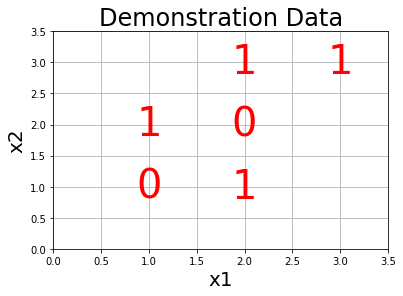

In [3]:
#Nothing to do here. Just execute the command to gain a proper visualization!
%matplotlib inline

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'r',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Demonstration Data', size = 24)

A Decision Tree Classifier (DTC) builds a decision tree based on the features of the data. This is equivalent to subdividing the feature space. Let's consider the example above and apply a simple heuristics. In the first step we try to subdivide the space such that we obtain the largest possible leaf (subdivision) that contains only one class.
<br>
We first look at the feature $x_2$, i.e. a horizontal division of the space. For example, we could divide the space at the specific threshold $x_2 = 2.5$. Then we end up having a group of samples with features $x_2 > 2.5$ and homogenous class label 1, i.e. the two points with coordinates $\{ (2,3), (3,3) \}$ . If we instead look at the feature $x_1$, corresponding to a vertical division of the space, we cannot find an equally large or larger group of samples with the same label. Therefore, our first node in the tree is: $x_2 \leq 2.5$, i.e. we split the space and repeat the same procedure on each of the two leafs. In our case we are done with the top leaf (since both samples have the same class) and only need to repeat the procedure on the bottom leaf.

Our simple heuristics from above fails on the bottom node. We need a better criterion to decide which splits to make. Nowadays the most frequently used one is called the Gini Impurity. 

The Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
<br>
What does that mean? Let us suppose we have $2$ labels and let $p_1, p_2$ be the fractions of points labeld with labels $1$ and $2$ (note: $p_1 + p_2 = 1$) . The probabilty to choose a point with label $1$ is $p_1$. 
The probability to choose label $2$ is $p_2 = 1-p_1$. Therefore, the probability to label a point of label $1$ with label $2$ is $p_1 \cdot p_2 = p_1 \cdot (1-p_1) = p_1 - p_1^2$. 
<br>
Analogously, the probability for points with label $2$ to be labeld with $1$ is $p_2 \cdot (1-p_2) = p_2 - p_2^2$. The Gini impurity is the sum over both: $p_1 - p_1^2 + p_2 - p_2^2 = p_1 + p_2 - p_1^2 - p_2^2 = 1 - p_1^2 -p_2^2$
<br>
The above reasoning is easy to generalize to the case where the number of labels $M$ is larger then two: $M > 2$ . The formula for the given dataset $Z$ is simply
$$I_G(Z) = 1 - \sum_{k = 1}^M p_k(Z)^2,$$ where $p_k(Z)$ is the frequency of points with labels $k$ in the dataset $Z$. Your task will now be to apply these techniques explicitly to the toy data set introduced above.
<br>
*  Calculate the Gini impurity for our toy dataset
* Calculate the Gini impurity for the top and bottom leaf in our split

The Gini impurity Gain is the amount of "impurity" we get rid of for a specific split $s$.
Let's assume that we get the partition $Z_{s,1}, \ldots, Z_{s,K_s}$ of $Z$ after applying $s$. Then the impurity gain is
$$g_G(Z,s) = I_G(Z) - \sum_{t=1}^{K_s} \frac{|Z_{s,t}|}{|Z|} \cdot I_G(Z_{s,t})$$
* Calculate the Gini information gain for our split in the toy dataset 

<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>

Calculate the Gini impurity for our toy dataset:
\begin{align*}
I_G(Z) &= 1 - p_0(Z)^2 - p_1(Z)^2 \\
&= 1 - (\frac{2}{6})^2 - (\frac{4}{6})^2\\
&= \frac{4}{9}
\end{align*}

Calculate the Gini impurity for the top and bottom leaf in our split: <br>
top leaf (samples which x_2 > 2.5):
\begin{align*}
I_G(Z_{s,1}) &= 1 - (\frac{0}{2})^2 -(\frac{2}{2})^2 \\
&= 1 - 1 \\
&= 0
\end{align*}

bottom leaf (samples which x_2 <= 2.5):
\begin{align*}
I_G(Z_{s,2}) &= 1 - (\frac{1}{2})^2 - (\frac{1}{2})^2 \\
&= 1 - \frac{1}{2}\\
&= \frac{1}{2}
\end{align*}

Calculate the Gini information gain for our split in the toy dataset:
\begin{align*}
g_G(Z,s) &= \frac{4}{9} - \frac{2}{6} \cdot 0 - \frac{4}{6} \cdot \frac{1}{2}\\
&= \frac{1}{9}
\end{align*}

<h2 style="color:rgb(0,120,170)">Task 2: Train a simple decision tree </h2>

Next we provide a Python routine for the previous example. In the cells below there are code snippets you have to fill in:
* Train a decision tree
* Print the number of tree nodes, the maximum depth of the tree and the accuracy

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [42]:
#Your code
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

number_nodes = clf.tree_.node_count
maximal_depth = clf.tree_.max_depth

predicted_y = clf.predict(X, check_input=True)
acc = accuracy_score(y, predicted_y, normalize=True)
""" Same result through acc = ...
true = 0
for index, element in enumerate(predicted_y):
    if element == y[index]:
        true += 1
calculated_acc = true/len(predicted_y)
print(len(predicted_y))
"""

print(f'''
Number of nodes in tree: {number_nodes}
Maximal depth of tree: {maximal_depth}
Accuracy of tree predictions: {acc}
''')



Number of nodes in tree: 9
Maximal depth of tree: 3
Accuracy of tree predictions: 1.0



<h2 style="color:rgb(0,120,170)">Task 3: Decision tree on a real data set</h2>

Now we will apply the different classifiers we have encountered so far to a real-world benachmark data set, which is often used in applications, namely the "Fashion MNIST" data set. It consits of images of clothing, like sneakers and shirts. It was created to be an alternative to the famous MNIST benchmark dataset, which is nowadays considered as too easy for the most recent algorithms. Let us first load the train and test set, using the files provided in moodle. The train and test data are represented as pixel arrays, and the label vector indicates the different classes (0 to 9).

In [3]:
#nothing to do here. Just execute the command!
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
x_train = np.array(img_train)
y_train = np.array(labels_train)

img_test, labels_test = data.load_testing()
x_test = np.array(img_test)
y_test = np.array(labels_test)

In [4]:
x_train2 = x_train
y_train2 = y_train
x_test2 = x_test
y_test2 = y_test

Let us plot some of the images so that you see, how these data look like.

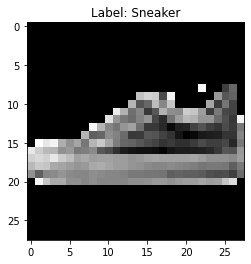

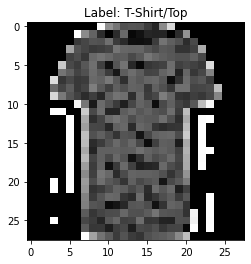

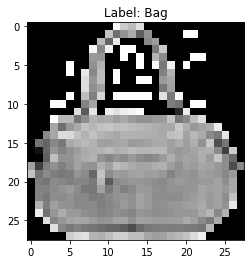

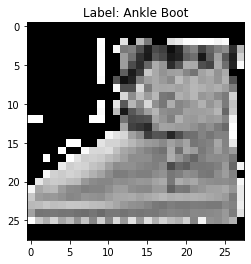

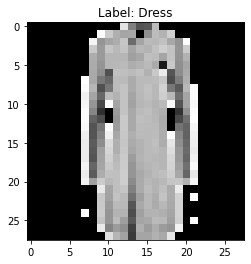

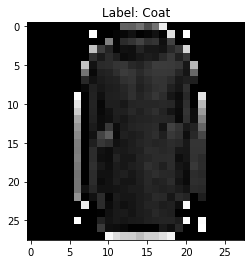

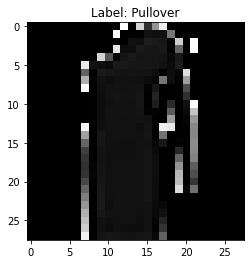

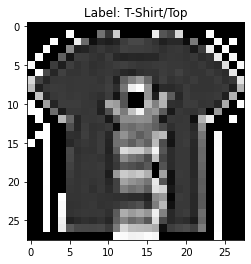

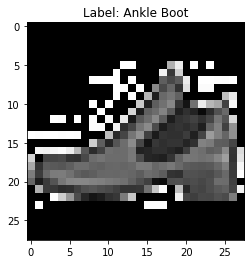

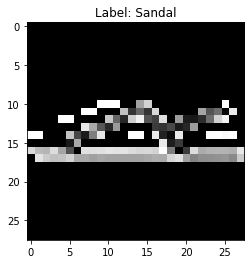

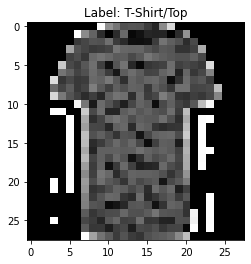

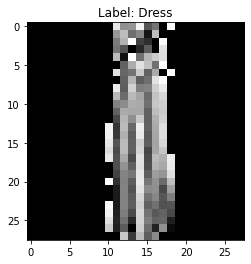

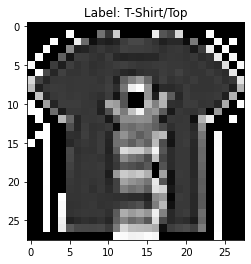

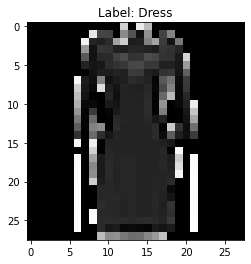

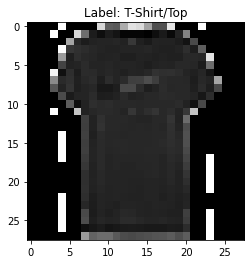

In [3]:
#nothing to do here. Just execute the command!
arr = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
a = np.random.randint(1,40,15)
for i in a:
    two_d = (np.reshape(x_train[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

Here we provide you a routine that trains a decision tree for the given training set. The function get_evaluation should additionally help you to compute accuracies and provide confusion matrices and appropriate heat maps.

In [8]:
#nothing to do here. Just execute the command!
print('\nPreparing Classifier')
model1=DecisionTreeClassifier(criterion="gini",max_depth=50,splitter="best",random_state=RSEED)
model1.fit(x_train,y_train)


Preparing Classifier


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [5]:
#nothing to do here. Just execute the command!
def get_evaluation(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print('\nPredicted Values: ', y_pred)
    print('\nAccuracy of Classifier on Test Image Data: ', accuracy)
    print('\nConfusion Matrix: \n', conf_mat)

    plt.matshow(conf_mat)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Predicted Values:  [0 1 6 ... 8 8 2]

Accuracy of Classifier on Test Image Data:  0.7983

Confusion Matrix: 
 [[735   5  14  43   8   3 179   1  12   0]
 [  5 965   3  16   4   0   5   0   2   0]
 [ 24   4 682  18 140   3 119   0   9   1]
 [ 43  33  17 818  48   1  36   0   4   0]
 [ 10   2 147  43 687   1 103   0   6   1]
 [  2   1   1   2   2 876   1  61  21  33]
 [172   8  99  41 107   3 553   0  16   1]
 [  1   0   0   0   0  52   2 865   5  75]
 [ 18   2  17   6  13  11  19   6 905   3]
 [  1   0   1   2   1  27   3  66   2 897]]


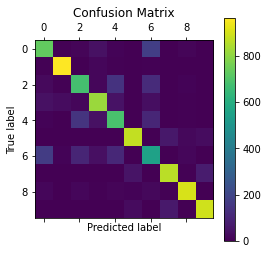

In [6]:
#nothing to do here. Just execute the command!
get_evaluation(model1, x_test, y_test)


In order to obtain a better performance, we apply a hyperparameter search. 
* To this end create a parameter grid which iterates over the following quantities: criterion: 'gini' and 'entropy', max_depth: 10,50 and 100, splitter: 'random' and 'best'. 
* Again use a decision tree classifier and grid search with 5 iterations and 3 fold cross validation. Of course you may use the built-in routines from sklearn.
* Also plot the confusion matrices and heat maps of the model evaluated at the test set (similarly as before).

Don't forget to pass the seed. Warning: this may take several minutes ;)

<h3 style="color:rgb(210,90,80)">Code (30 points):</h3>

In [84]:
#your code
from sklearn.model_selection import ParameterGrid
np.random.seed(50)
dic_for_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [10,50,100], 'splitter': ['random', 'best']}
param_grid = ParameterGrid(dic_for_grid) # each entry of the grid is the dic_for_grid with one chosen value 
#of each key


In [134]:
# For cross validation divide dataset in 3 parts of equal size
img_train, labels_train = data.load_training()
img_test, labels_test = data.load_testing()
img_train.extend(img_test) # you can easily extend the feature list to get list of whole dataset
img_train = np.array(img_train) 

labels_train = labels_train.tolist()
labels_test = labels_test.tolist()
labels_train.extend(labels_test)
labels_train = np.asarray(labels_train) # convert the list of labels back to an array


x1 = img_train[0 : int(len(img_train)/3)]
x2 = img_train[int(len(img_train)/3) : int(len(img_train)*2/3)]
x3 = img_train[int(len(img_train)*2/3) : (len(img_train))]
# are lists

y1 = labels_train[0 : int(len(img_train)/3)]
y2 = labels_train[int(len(img_train)/3) : int(len(img_train)*2/3)]
y3 = labels_train[int(len(img_train)*2/3) : int(len(img_train))]

# x1, x2, x3 are now our three different folds for cross validation

In [135]:
# Lets combine the folds:
train_x_1 = []# x3 is test set
train_x_1.extend(x1) # when you use extend for two simple lists the result would be one big list without nested lists
train_x_1.extend(x2)

train_x_2 = []# x2 is test set
train_x_2.extend(x1)
train_x_2.extend(x3)

train_x_3 = []# x1 is test set
train_x_3.extend(x2)
train_x_3.extend(x3)

train_y_1 = []# y3 is test set
train_y_1.extend(y1)
train_y_1.extend(y2)

train_y_2 = []# y2 is test set
train_y_2.extend(y1)
train_y_2.extend(y3)

train_y_3 = []# y1 is test set
train_y_3.extend(y2)
train_y_3.extend(y3)


outer_list_x = []
outer_list_x.append(train_x_1) # here we use append because we want nested lists in one list
outer_list_x.append(train_x_2)
outer_list_x.append(train_x_3)

outer_list_y = []
outer_list_y.append(train_y_1) # here we use append because we want nested lists in one list
outer_list_y.append(train_y_2)
outer_list_y.append(train_y_3)


In [151]:
# Lets loop of the outer_list_x such that we can make use of the crossentropy:
import pickle
best_acc = 0
outer_index = 0
for current_train_x_list, current_train_y_list in zip(outer_list_x, outer_list_y): 
    # iterate over two lists at same time
    print('New training and test sets used via Cross Validation:')
    
    # We need for each 'epoch' of the cross validation 5 different hyperparameter settings.
    np.random.seed(50)
    changed_order_indices = np.random.permutation(len(param_grid)) # choose the param_grids hyperparameters randomly
    # few lines beneath
        
    for i in range(5): # we want to have 5 different hyperparameter settings
        random_index = changed_order_indices[i]
        
        my_tree = DecisionTreeClassifier(criterion=param_grid[random_index]['criterion'],
                                        max_depth = param_grid[random_index]['max_depth'],
                                         splitter=param_grid[random_index]['splitter'],
                                         random_state=RSEED)
    
        # Fit the Tree on the current training set:
        current_train_x_list = np.asarray(current_train_x_list)
        current_train_y_list = np.asarray(current_train_y_list)
        my_tree.fit(current_train_x_list, current_train_y_list) 
        
        print('Evaluation for the individual hyperparameter setting...')
        # Evaluate the trained tree on the current testset:
        if outer_index == 0:
            y_pred = my_tree.predict(x3)
            accuracy = accuracy_score(y3, y_pred)
            if accuracy > best_acc:
                best_acc = accuracy
                pickle.dump(my_tree, open(f"my_best_tree.pkl", "wb")) # save the model
                saved_x_test = x3
                saved_y_test = y3
            
        elif outer_index == 1: 
            y_pred = my_tree.predict(x2)
            accuracy = accuracy_score(y2, y_pred)
            if accuracy > best_acc:
                best_acc = accuracy
                pickle.dump(my_tree, open(f"my_best_tree.pkl", "wb")) # save the model
                saved_x_test = x2
                saved_y_test = y2
            
        elif outer_index == 2: 
            y_pred = my_tree.predict(x1)
            accuracy = accuracy_score(y1, y_pred)
            if accuracy > best_acc:
                best_acc = accuracy
                pickle.dump(my_tree, open(f"my_best_tree.pkl", "wb")) # save the model
                saved_x_test = x1
                saved_y_test = y1
 
        else:
            print('error: the loop should have stopped already.')
    
    
    outer_index += 1 # is the index of the big loop            
    

New training and test sets used via Cross Validation:
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
New training and test sets used via Cross Validation:
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
New training and test sets used via Cross Validation:
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting...
Evaluation for the individual hyperparameter setting..


Predicted Values:  [8 9 6 ... 3 3 4]

Accuracy of Classifier on Test Image Data:  0.8046114944499207

Confusion Matrix: 
 [[1770    9   53  107   16    3  390    1   19    0]
 [  24 2226    9   65    9    2   12    0    5    0]
 [  41    9 1540   34  316    1  297    0   33    2]
 [ 107   53   38 1927  111    4   93    0   13    3]
 [  17   10  321  129 1549    1  222    0   25    0]
 [   2    5    2    5    2 2090    6  137   18   48]
 [ 338   17  327   73  257    0 1286    0   50    1]
 [   0    0    0    0    0  122    0 2138    6  154]
 [  25    5   20   18   11   26   47   15 2133    8]
 [   0    1    3    3    1   53    3  138    8 2115]]


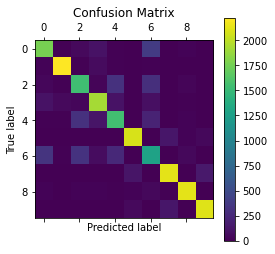

In [149]:
# Evaluate the best model:
with open('my_best_tree.pkl', 'rb') as f:
    my_model = pickle.load(f)
    get_evaluation(my_model, saved_x_test, saved_y_test)
    

If you did the task correctly, you should obtain a slightly better result than before.

<h2 style="color:rgb(0,120,170)">Task 4: Comparison with KNN and SVMs</h2>

In this task we make a comparison to the other previously used classifiers, i.e. KNNs and SVMs:
* Implement a KNN classifier with n_neighbors = 5, weights = 'distance' and p=1. Do the same tasks as for the tree.
* Implement a SVM classifier with C=10, kernel='poly', gamma='auto'. Do the same tasks as for the tree.
Again, this may take some time!

Afterwards answer some questions that correspond to your observations.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

Q&A session: We don't need to use cross validation anymore. <br> It follows that we can use the given training and test sets from the beginning of task 3.

In [6]:
#Your code for KNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)


In [9]:
knn.fit(x_train2, y_train2)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='distance')


Predicted Values:  [0 1 2 ... 8 8 2]

Accuracy of Classifier on Test Image Data:  0.8671

Confusion Matrix: 
 [[875   1  13  12   3   0  88   2   6   0]
 [  5 970   8  14   1   0   2   0   0   0]
 [ 12   1 804  11  84   0  87   0   1   0]
 [ 35   9   8 888  35   0  23   0   2   0]
 [  3   0 107  27 784   0  78   0   1   0]
 [  0   0   0   1   0 881   0  70   1  47]
 [198   2 111  19  68   0 596   0   6   0]
 [  0   0   0   0   0   6   0 949   0  45]
 [  4   1  11   0   4   2   8  10 958   2]
 [  0   0   0   0   0   3   0  31   0 966]]


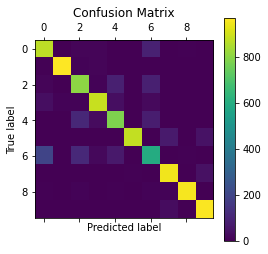

In [10]:
get_evaluation(knn, x_test2, y_test2)


In [12]:
#Your code for SVM
from sklearn import svm
from sklearn.svm import SVC

my_svc = SVC( C=10.0, kernel='poly', gamma='auto')
my_svc.fit(x_train2, y_train2)


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Predicted Values:  [0 1 2 ... 8 8 1]

Accuracy of Classifier on Test Image Data:  0.8772

Confusion Matrix: 
 [[827   0  19  18   2   1 121   0  10   2]
 [  1 988   0   8   1   0   2   0   0   0]
 [ 23   2 816  13  76   1  65   0   4   0]
 [ 44  19  21 870  23   0  23   0   0   0]
 [  7   3 100  35 794   0  58   0   3   0]
 [  2   0   0   1   0 946   0  31   3  17]
 [140   6  87  34  57   0 667   0   9   0]
 [  0   0   0   0   0  16   0 942   0  42]
 [ 13   0   3   2   2   2  13   1 963   1]
 [  0   0   0   0   0  13   0  27   1 959]]


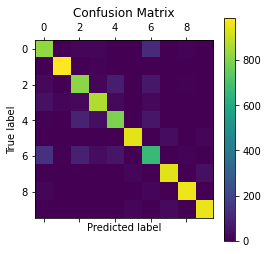

In [13]:
get_evaluation(my_svc, x_test2, y_test2)


<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

What observations can you make so far? Tick the correct boxes (several may be correct):

    
\[  \]  The tree model is much faster than KNN and SVM, and also yields a better accuracy. <br>
\[ X \]  The SVM model yields a better accuray than KNN.My note: Only small difference here!!! <br>
\[ X \] As this is already a large data set, it is no big surprise that the SVM with kernel trains very long.

<h2 style="color:rgb(0,120,170)">Task 5: Preparation towards ensembles of trees</h2>

In the upcoming lectures you will discuss ensemble methods for trees that aggregate and/or average single tree models to acchieve better performances and/or faster runtimes, compared to the ones we used here. Random Forests are a famous example, where an average over trees is built in a way, such that the overall variance (of the average) is reduced. We will now formalize the situation:

Let's say you have $X_1,...,X_B$ identically distributed random variables, which are NOT necessarily independent. Let us denote the variance of a single variable $X_i$ by $\sigma^2$ and the correlation coefficient between two $X_i$ and $X_j$ for $j \ne i$ by $\rho=\frac{E(X_i X_j)-E(X_i)E(X_j)}{\sigma^2}$ (keep in mind that all $X_i$'s are identically distributed!). 

Show that $$\text{Var}\left(\frac{1}{B} \sum_{i=1}^B X_i \right)=\rho \sigma^2 +\frac{1-\rho}{B} \sigma^2. \quad (1)$$

Hint: Apply the definition of the variance to the given average. Split up the resulting double sum in parts with equal and unequal indices. How many are there?

This gives some intuition about how to control the overall variance of averages. One can reduce it e.g. by a small correlation coefficient $\rho$ and a large number of models $B$.

<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>

\begin{align*}
&X_g = \sum_{i=1}^{B} X_i\\
&\bar{X}_g = \frac{1}{B}\ \sum_{i=1}^{B} X_i\\
&Var(\bar{X}_g) = Var(X_g) \cdot \frac{1}{B \cdot B} = \frac{1}{B^2} \sum_{i=1}^{B}\sum_{j=1}^{B} Cov(X_i,X_j)
\end{align*}

<br><br>




\begin{align*}
i = j: 
\rho = \frac{Cov(X_i, X_j)}{\sigma^2} = \frac{Cov(X_i, X_i)}{\sigma^2} 
\end{align*}
X_i correlates with itself --> Correlation coefficent = 1
\begin{align*}
\rho = 1 = \frac{Cov(X_i, X_i)}{\sigma^2}\\
Cov(X_i,X_i) = Cov(X_i, X_j) = \sigma^2\\
\end{align*}
appears B times (at double sum)
<br><br>


\begin{align*}
\\
i \ne j: 
\rho = \frac{Cov(X_i, X_j)}{\sigma^2}\\
Cov(X_i,X_j) = \rho \sigma^2\\
\end{align*}
appears BB-B times because we have with double sum BB observations minus the B when i = j
<br><br>
\begin{align*}
\\
&Var(\bar{X}_g) = \frac{1}{B^2} (B \sigma^2 + (B^2 - B) \rho \sigma^2 = \frac{B \sigma^2}{B^2} +\frac{B^2 - B}{B^2}\rho\sigma^2 = \frac{\sigma^2}{B} +\frac{B - 1}{B}\rho\sigma^2= \frac{\sigma^2}{B} +\frac{B\rho\sigma^2}{B} - \frac{\rho\sigma^2}{B}=\rho\sigma^2 + \frac{\sigma^2 - \rho\sigma^2}{B}\\
&=\rho\sigma^2 + \frac{1- \rho}{B}\sigma^2
\end{align*}